In [1]:
pip install pandas

Keyring is skipped due to an exception: 'str' object has no attribute 'name'
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pillow

Keyring is skipped due to an exception: 'str' object has no attribute 'name'
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy

Keyring is skipped due to an exception: 'str' object has no attribute 'name'
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install sklearn

Keyring is skipped due to an exception: 'str' object has no attribute 'name'
Note: you may need to restart the kernel to use updated packages.


In [5]:

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB



import numpy as np
import matplotlib.pyplot as plt
from PIL import Image




RANDOM_STATE = 0 

In [6]:
pip install matplotlib

Keyring is skipped due to an exception: 'str' object has no attribute 'name'
Note: you may need to restart the kernel to use updated packages.


In [7]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt


In [8]:
np.set_printoptions(threshold=10000)

In [9]:
# Pandas funcionando com arquivo local
f_liwc = pd.read_csv(r"emo_liwc3_class.csv", names = ['texto', 'Polarity Liwc'])
f_liwc.head()

,texto,Polarity Liwc
0,hi dear diary i m here again feeling like shit...,-1
1,it s wonderful to know that each day we are ge...,1
2,in life we need to count with support of that ...,1
3,i m pretty happy and hope you are too,1
4,to celebrate we order pizza and i did a letter...,0


In [10]:
f_liwc.columns

Index(['texto', 'Polarity Liwc'], dtype='object')

In [11]:
f_liwc2 = f_liwc.reset_index()

In [12]:

f_mqd = pd.read_csv(r"https://raw.githubusercontent.com/LaCAfe/MQD-1465/main/MQD-1465.csv", names = ['texto', 'Polarity Judge', 'Juiz'])
f_mqd.head()

,texto,Polarity Judge,Juiz
36,"Oi querido diário, mais uma vez estou aqui me ...",-1,3
37,É maravilhoso saber que a cada dia estamos nos...,1,3
38,Na vida precisamos contar com o apoio daquela ...,0,3
39,Estou muito feliz e espero que você também.,1,3
40,"Pra comemorar pedimos pizza, e eu fiz uma cart...",1,3


In [13]:
f_mqd.columns

Index(['texto', 'Polarity Judge', 'Juiz'], dtype='object')

In [14]:
f_mqd2 = f_mqd.reset_index()

In [15]:
#Concatena dois dataframes em um terceiro, novo dataframe
f = pd.concat([f_mqd2, f_liwc2], axis=1)


f

,index,texto,Polarity Judge,Juiz,index,texto,Polarity Liwc
0,36,"Oi querido diário, mais uma vez estou aqui me ...",-1,3,0,hi dear diary i m here again feeling like shit...,-1
1,37,É maravilhoso saber que a cada dia estamos nos...,1,3,1,it s wonderful to know that each day we are ge...,1
2,38,Na vida precisamos contar com o apoio daquela ...,0,3,2,in life we need to count with support of that ...,1
3,39,Estou muito feliz e espero que você também.,1,3,3,i m pretty happy and hope you are too,1
4,40,"Pra comemorar pedimos pizza, e eu fiz uma cart...",1,3,4,to celebrate we order pizza and i did a letter...,0
...,...,...,...,...,...,...,...
1460,1531,Atualmente estou em um relacionamento homossex...,0,2,1460,i am currently in a homosexual relationship,0
1461,1532,"Hoje iniciei o dia conversando com o Gabriel, ...",0,3,1461,today i started the day talking to gabriel the...,0
1462,1533,"Mas ele é lindo, aquele sorriso, a forma como ...",1,3,1462,but he s handsome that smile the way he talks ...,1
1463,1534,"Mandei um e-mail para o meu ""colega"" na quarta...",0,3,1463,i sent an email to my colleague last wednesday...,0


In [16]:
#f.drop(['Polarity Judge']==0, axis=0, inplace= True)

f2= f[f['Polarity Judge']!=0].copy()

f2.head()

,index,texto,Polarity Judge,Juiz,index,texto,Polarity Liwc
0,36,"Oi querido diário, mais uma vez estou aqui me ...",-1,3,0,hi dear diary i m here again feeling like shit...,-1
1,37,É maravilhoso saber que a cada dia estamos nos...,1,3,1,it s wonderful to know that each day we are ge...,1
3,39,Estou muito feliz e espero que você também.,1,3,3,i m pretty happy and hope you are too,1
4,40,"Pra comemorar pedimos pizza, e eu fiz uma cart...",1,3,4,to celebrate we order pizza and i did a letter...,0
5,41,Nós possuímos o ingrediente básico que tudo su...,1,2,5,we have a basic ingredient that will sustain e...,1


In [17]:
f3= f2[f2['Polarity Liwc']!=0].copy()

f3.head()

,index,texto,Polarity Judge,Juiz,index,texto,Polarity Liwc
0,36,"Oi querido diário, mais uma vez estou aqui me ...",-1,3,0,hi dear diary i m here again feeling like shit...,-1
1,37,É maravilhoso saber que a cada dia estamos nos...,1,3,1,it s wonderful to know that each day we are ge...,1
3,39,Estou muito feliz e espero que você também.,1,3,3,i m pretty happy and hope you are too,1
5,41,Nós possuímos o ingrediente básico que tudo su...,1,2,5,we have a basic ingredient that will sustain e...,1
9,45,"Sou muito alta e magra, não tenho corpo, e sof...",-1,3,9,i m too tall and skinny don t have body and i ...,-1


In [18]:
type(f3['Polarity Judge'])

pandas.core.series.Series

In [19]:
f3.dtypes

index              int64
texto             object
Polarity Judge     int64
Juiz               int64
index              int64
texto             object
Polarity Liwc      int64
dtype: object

In [20]:
f3=f3.dropna()

In [21]:
polarity_judge = f3['Polarity Judge'].values
polarity_judge

array([-1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1, -1,
       -1, -1,  1, -1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1, -1,
       -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
        1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1,  1, -1,  1, -1, -1,  1,  1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1, -1,  1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
        1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [22]:
polarity_judge2 = f3['Polarity Judge'].values.copy()
polarity_judge2

array([-1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1, -1,
       -1, -1,  1, -1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1, -1,
       -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
        1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1,  1, -1,  1, -1, -1,  1,  1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1, -1,  1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
        1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [23]:
polarity_liwc = f3['Polarity Liwc'].values
polarity_liwc

array([-1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,
        1, -1,  1, -1,  1,  1, -1, -1, -1, -1,  1, -1,  1, -1, -1,  1, -1,
       -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1, -1,
        1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1, -1,
       -1,  1, -1, -1,  1, -1, -1, -1, -1,  1,  1, -1, -1,  1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1, -1, -1, -1, -1, -1,
       -1,  1, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1,  1,
        1, -1, -1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1,
       -1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1, -1,
       -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
        1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1

In [24]:
def get_confusion_matrix(reais, preditos, labels):
#     """
#     Uma função que retorna a matriz de confusão para uma classificação binária
    
#     Args:
#         reais (list): lista de valores reais
#         preditos (list): lista de valores preditos pelo modelos
#         labels (list): lista de labels a serem avaliados.
#             É importante que ela esteja presente, pois usaremos ela para entender
#             quem é a classe positiva e quem é a classe negativa
    
#     Returns:
#         Um numpy.array, no formato:
#             numpy.array([
#                 [ tp, fp ],
#                 [ fn, tn ]
#             ])
#     """
    # não implementado
    if len(labels) > 2:
        return None

    if len(reais) != len(preditos):
        return None
    
    # considerando a primeira classe como a positiva, e a segunda a negativa
    true_class = labels[0]
    negative_class = labels[1]

    # valores preditos corretamente
    tp = 0
    tn = 0
    
    # valores preditos incorretamente
    fp = 0
    fn = 0
    
    for (indice, v_real) in enumerate(reais):
        v_predito = preditos[indice]

        # se trata de um valor real da classe positiva
        if v_real == true_class:
            tp += 1 if v_predito == v_real else 0
            fp += 1 if v_predito != v_real else 0
        else:
            tn += 1 if v_predito == v_real else 0
            fn += 1 if v_predito != v_real else 0
    
    return np.array([
        # valores da classe positiva
        [ tp, fp ],
        # valores da classe negativa
        [ fn, tn ]
    ])

get_confusion_matrix(reais=polarity_judge, preditos=polarity_liwc, labels=[1,-1])
# array([[3, 1], [2, 4]])

array([[378,  32],
       [ 85, 287]])

In [25]:
confusion_matrix = pd.crosstab(f3['Polarity Judge'], f3['Polarity Liwc'], rownames=['Actual'], colnames=['Liwc'])
print (confusion_matrix)


Liwc     -1    1
Actual          
-1      287   85
 1       32  378


In [26]:
import seaborn as sn

In [27]:
import matplotlib.pyplot as plt

Liwc     -1    1
Actual          
-1      287   85
 1       32  378


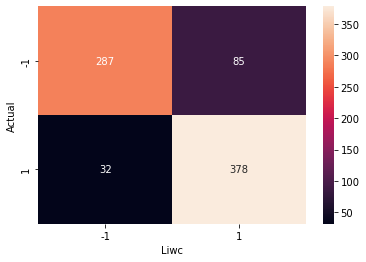

In [28]:
confusion_matrix = pd.crosstab(f3['Polarity Judge'], f3['Polarity Liwc'], rownames=['Actual'], colnames=['Liwc'])
print (confusion_matrix)
sn.heatmap(confusion_matrix, annot=True, fmt="d")
plt.show()

Liwc     -1    1  All
Actual               
-1      287   85  372
1        32  378  410
All     319  463  782


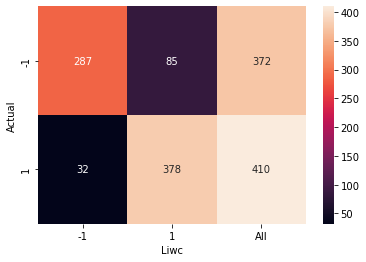

In [29]:
confusion_matrix = pd.crosstab(f3['Polarity Judge'], f3['Polarity Liwc'], rownames=['Actual'], colnames=['Liwc'], margins = True)
print (confusion_matrix)
confusion_matrix = confusion_matrix.drop('All', axis=0)
sn.heatmap(confusion_matrix, annot=True, fmt="d")
plt.show()

<AxesSubplot:xlabel='Liwc', ylabel='Actual'>

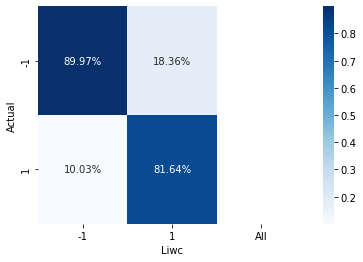

In [30]:
sn.heatmap(confusion_matrix/np.sum(confusion_matrix.drop("All", axis=1)), annot=True, 
            fmt='.2%', cmap='Blues')

In [31]:
from sklearn.metrics import classification_report

In [32]:
y_true = polarity_judge2.copy()
y_pred = polarity_liwc.copy()
target_names = ['class -1', 'class 1']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    class -1       0.90      0.77      0.83       372
     class 1       0.82      0.92      0.87       410

    accuracy                           0.85       782
   macro avg       0.86      0.85      0.85       782
weighted avg       0.86      0.85      0.85       782



In [33]:
from sklearn.metrics import confusion_matrix



In [34]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print(cf_matrix)

[[287  85]
 [ 32 378]]


In [35]:
import seaborn as sns
import numpy as np

<AxesSubplot:>

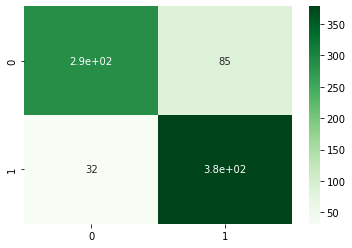

In [36]:
sns.heatmap(cf_matrix, annot=True, cmap='Greens')

<AxesSubplot:>

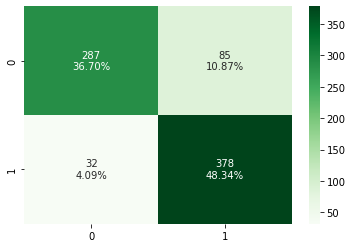

In [37]:
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')

In [38]:
confusion_matrix(y_true, y_pred)

array([[287,  85],
       [ 32, 378]])

In [39]:
from matplotlib.ticker import PercentFormatter

In [40]:
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix



In [41]:
pip install pretty-confusion-matrix

Keyring is skipped due to an exception: 'str' object has no attribute 'name'
Note: you may need to restart the kernel to use updated packages.


In [42]:
from pretty_confusion_matrix import pp_matrix

In [43]:
from pretty_confusion_matrix import pp_matrix_from_data

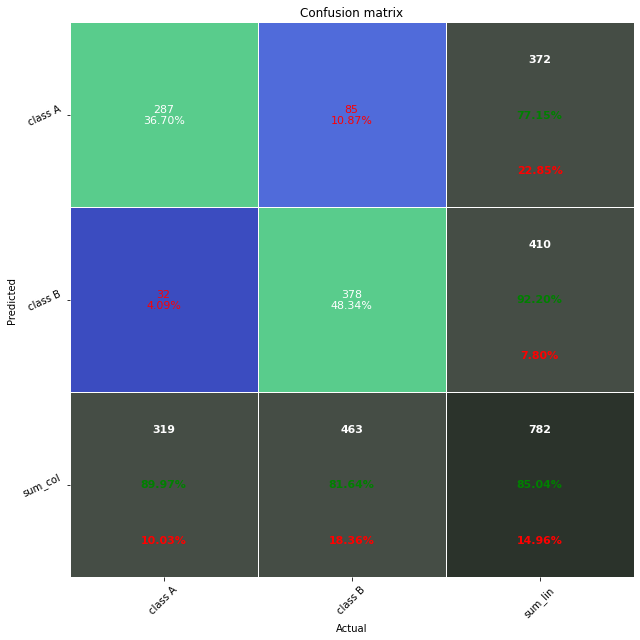

<Figure size 432x288 with 0 Axes>

In [44]:
cmap='Greens'
;
y_test = np.array(y_true)
predic = np.array(y_pred)
pp_matrix_from_data(predic,y_test, cmap='coolwarm')
plt.savefig('MQD_CM')

In [ ]:
from string import ascii_uppercase
from pandas import DataFrame
import numpy as np
import seaborn as sn


y_test = y_true
predic = y_pred

columns = ['class %s' %(i) for i in list(ascii_uppercase)[0:len(np.unique(y_test))]]

confm = confusion_matrix(y_test, predic)
df_cm = DataFrame(confm, index=columns, columns=columns)

ax = sn.heatmap(df_cm, cmap='Oranges', annot=True)